In [54]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv('/content/Airbnb_Open_Data.csv')    #file_path = "/content/Airbnb_Open_Data.csv"   # Update if in Google Drive      df = pd.read_csv(file_path)

In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (102599, 26)
Columns: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Convert price & service fee into numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.describe()


,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,6.581500e+04,6.581500e+04,65807.000000,65807.000000,65624.000000,65451.000000,65663.000000,55121.000000,65582.000000,65670.000000,65376.000000
mean,1.917587e+07,4.934098e+10,40.728086,-73.949290,2012.488571,8.137996,27.770160,1.430027,3.314477,8.897868,156.256929
std,1.049331e+07,2.854065e+10,0.055898,0.050277,5.760941,34.906587,52.128887,1.818019,1.263721,34.687120,134.420776
min,1.001254e+06,1.303496e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.008860e+07,2.465398e+10,40.688600,-73.982910,2008.000000,1.000000,1.000000,0.250000,2.000000,1.000000,22.000000
50%,1.917587e+07,4.920176e+10,40.722610,-73.954550,2012.000000,3.000000,7.000000,0.820000,3.000000,1.000000,133.000000
75%,2.826314e+07,7.413036e+10,40.762765,-73.931745,2017.000000,5.000000,29.000000,2.070000,4.000000,3.000000,285.000000
max,3.735041e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [ ]:
# Handle missing values
df['reviews per month'] = df['reviews per month'].fillna(0)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [ ]:
# Drop unnecessary columns
df.drop(['license'], axis=1, inplace=True)

In [ ]:
# Summary Stats
print(df.describe(include='all'))

                  id                 NAME       host id  \
count   1.025990e+05               102349  1.025990e+05   
unique           NaN                61281           NaN   
top              NaN  Home away from home           NaN   
freq             NaN                   33           NaN   
mean    2.914623e+07                  NaN  4.925411e+10   
min     1.001254e+06                  NaN  1.236005e+08   
25%     1.508581e+07                  NaN  2.458333e+10   
50%     2.913660e+07                  NaN  4.911774e+10   
75%     4.320120e+07                  NaN  7.399650e+10   
max     5.736742e+07                  NaN  9.876313e+10   
std     1.625751e+07                  NaN  2.853900e+10   

       host_identity_verified host name neighbourhood group  \
count                  102310    102193              102570   
unique                      2     13190                   7   
top               unconfirmed   Michael           Manhattan   
freq                    51200       881

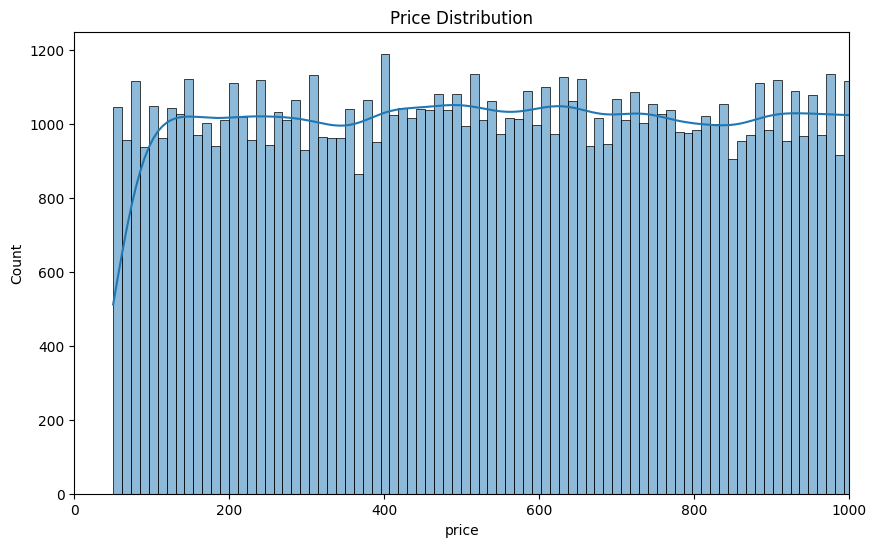

In [ ]:
# Distribution of Prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0,1000) # remove outliers for better view
plt.title("Price Distribution")
plt.show()

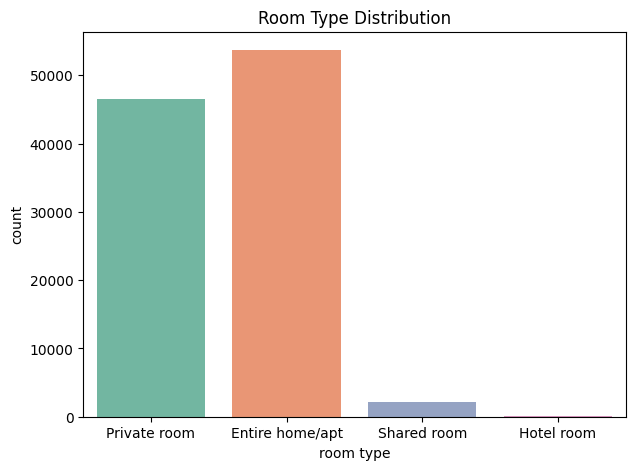

In [ ]:
# Room Type Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='room type', data=df, palette="Set2")
plt.title("Room Type Distribution")
plt.show()

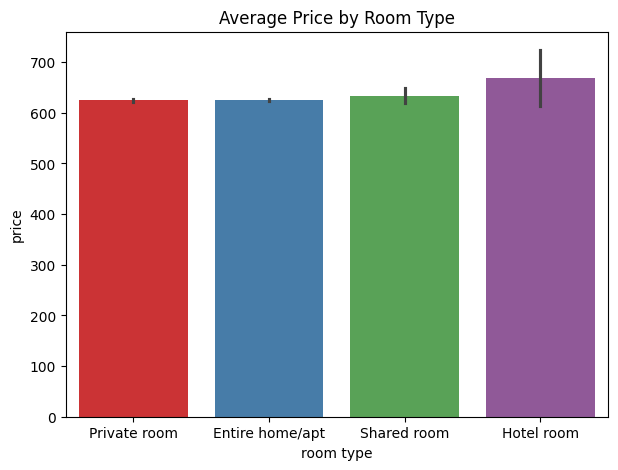

In [ ]:
# Average Price by Room Type
plt.figure(figsize=(7,5))
sns.barplot(x='room type', y='price', data=df, estimator=np.mean, palette="Set1")
plt.title("Average Price by Room Type")
plt.show()

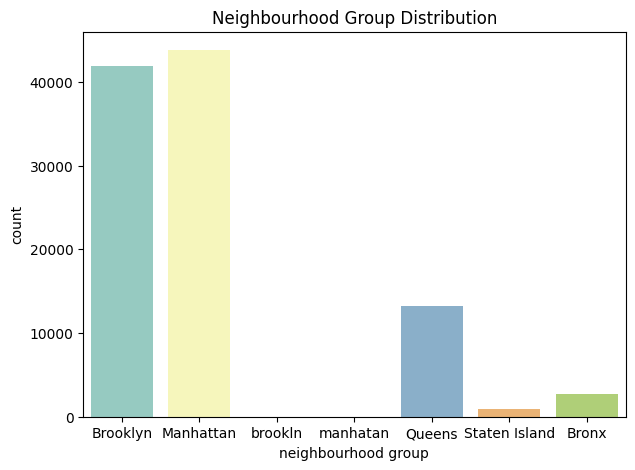

In [ ]:
# Neighbourhood Group Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='neighbourhood group', data=df, palette="Set3")
plt.title("Neighbourhood Group Distribution")
plt.show()

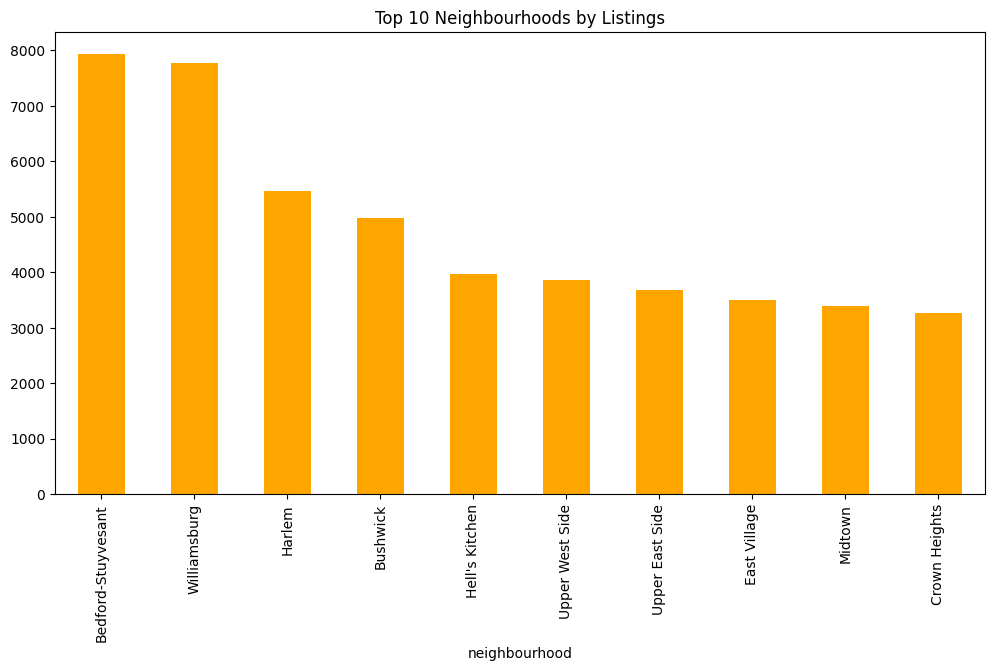

In [ ]:
# Top 10 Neighbourhoods by Listings
plt.figure(figsize=(12,6))
df['neighbourhood'].value_counts().head(10).plot(kind='bar', color="orange")
plt.title("Top 10 Neighbourhoods by Listings")
plt.show()

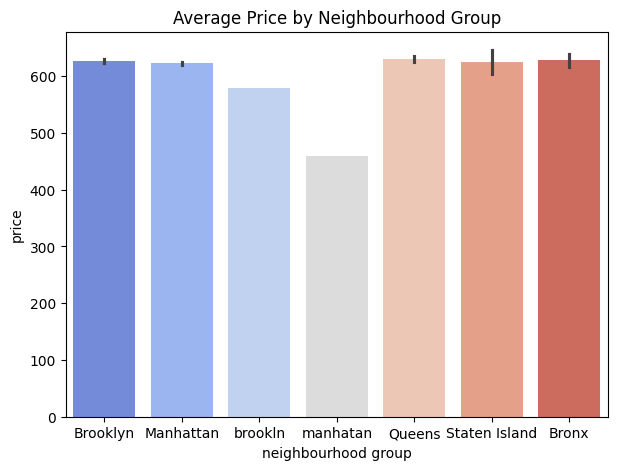

In [ ]:
# Average Price by Neighbourhood Group
plt.figure(figsize=(7,5))
sns.barplot(x='neighbourhood group', y='price', data=df, estimator=np.mean, palette="coolwarm")
plt.title("Average Price by Neighbourhood Group")
plt.show()

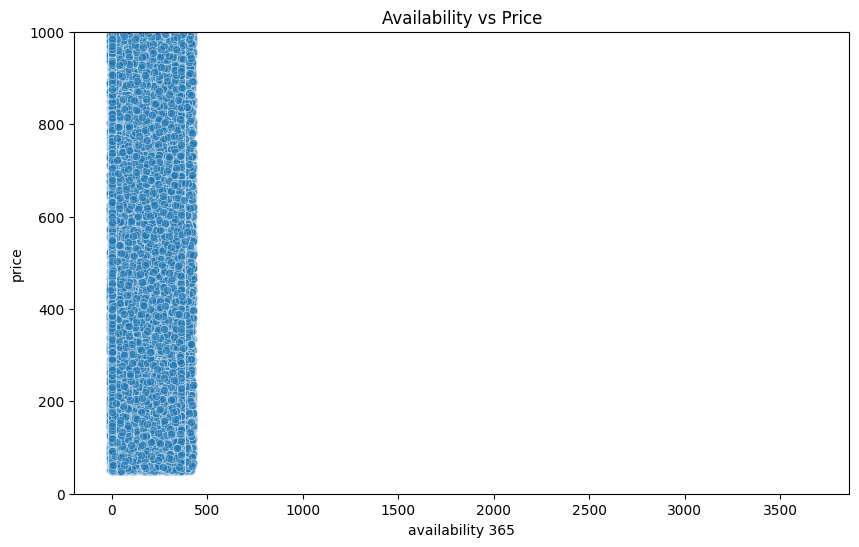

In [ ]:
# Availability vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='availability 365', y='price', data=df, alpha=0.5)
plt.ylim(0,1000) # limit outliers
plt.title("Availability vs Price")
plt.show()

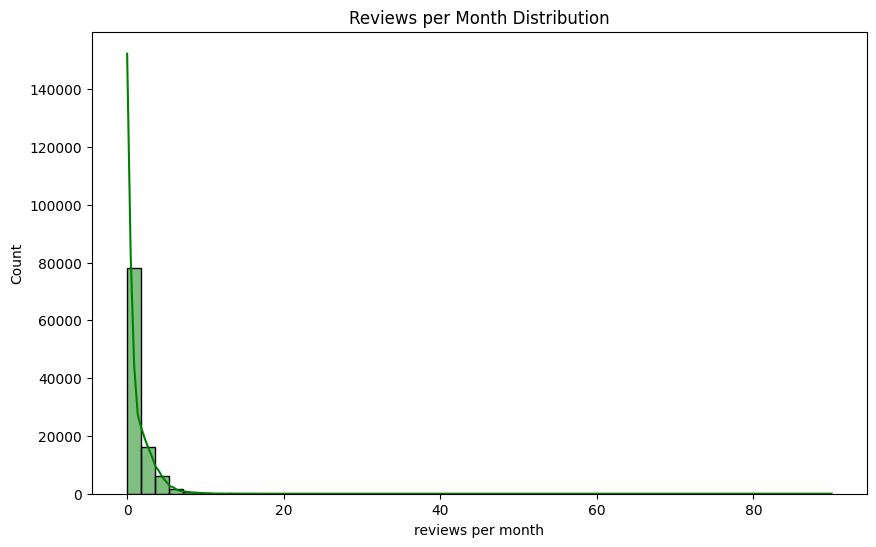

In [ ]:
# Reviews per Month Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['reviews per month'], bins=50, kde=True, color="green")
plt.title("Reviews per Month Distribution")
plt.show()

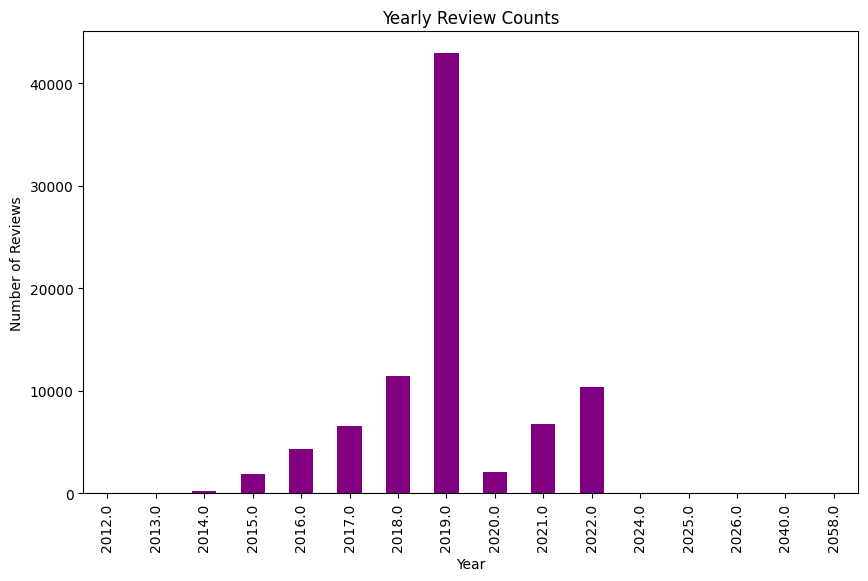

In [ ]:
# Yearly Review Trend
plt.figure(figsize=(10,6))
df['last review'].dt.year.value_counts().sort_index().plot(kind='bar', color="purple")
plt.title("Yearly Review Counts")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()